In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tested_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [4]:
df.shape

(418, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df['Age'].isnull().sum()

86

In [7]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

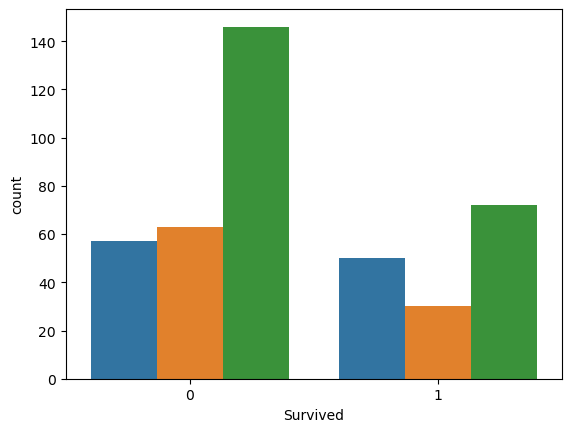

In [8]:
sns.countplot(data = df, x = df['Survived'], hue = df['Pclass'])

In [9]:
df['Sex']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

AttributeError: 'numpy.int64' object has no attribute 'startswith'

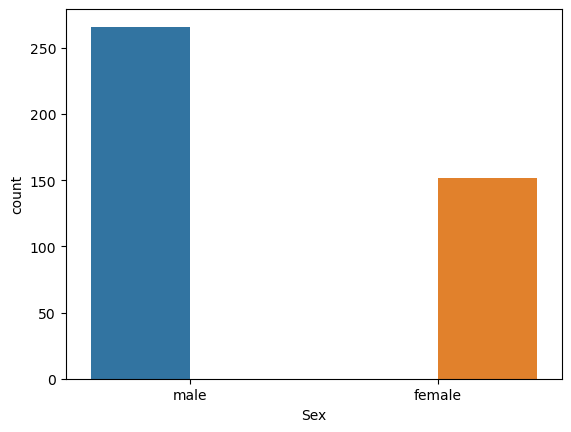

In [10]:
sns.countplot( x = df['Sex'], hue = df['Survived'])

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


AttributeError: 'numpy.int64' object has no attribute 'startswith'

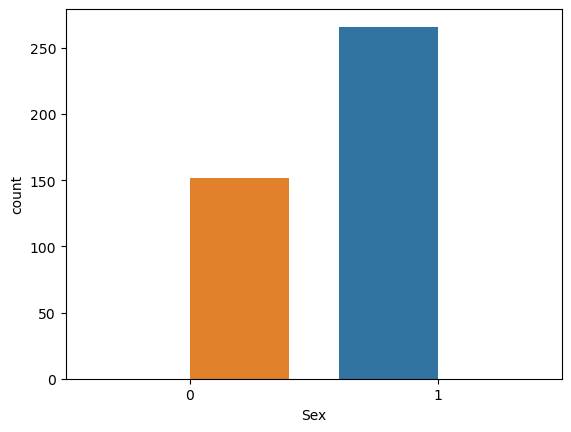

In [12]:
sns.countplot(x = df['Sex'], hue = df['Survived'])

In [13]:
df['Age'].isnull().sum()

86

<Axes: >

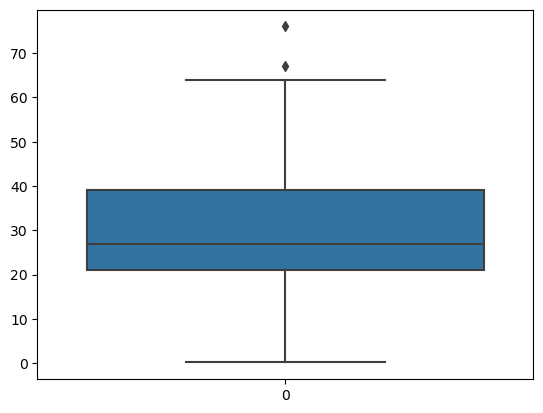

In [14]:
sns.boxplot(df['Age'])

In [15]:
df['Age'].fillna(df.Age.median(), inplace = True)

In [16]:
df['Age'].isnull().sum()

0

In [17]:
X = df[['Pclass', 'Sex', 'Age']] 
y = df['Survived']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [20]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import classification_report, accuracy_score
print("the accuracy score is ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

the accuracy score is  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        45

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [24]:
import warnings
warnings.filterwarnings('ignore')
# female = 0 male = 1
# df[['Pclass', 'Sex', 'Age']]
# result = classifier.predict([[3,0,22]]) # survived
# result = classifier.predict([[3,1,22]]) # died
# result = classifier.predict([[2,0,22]]) # survived
# result = classifier.predict([[2,1,22]]) # died
# result = classifier.predict([[1,0,22]]) # survived
# result = classifier.predict([[1,1,22]]) # died
# result = classifier.predict([[3,0,62]]) # survived
# result = classifier.predict([[3,1,62]]) # died
# result = classifier.predict([[2,0,62]]) # died
# result = classifier.predict([[2,1,62]]) # died
# result = classifier.predict([[1,0,62]]) # died
result = classifier.predict([[1,1,62]]) # died

if(result == 0):
    print("You are dead")
else:
    print("Congratulations! You Survived")

You are dead
